# Simulating Ultra narrowband Metasurface

In this simulation of [Paper Link](https://duke.box.com/s/owa6sdzf80y0u7xjp1qxia62md6z514q), I did 1200-1600nm parameter sweep, and linear polarization. Finding the transmittance of this structure.

## Preconditions

In [1]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td
import tidy3d.web as web
from tidy3d import material_library
import tidyHelper as th
import scienceplots

td.config.logging_level = "ERROR"

In [ ]:
h, sh, P = 0.21, 3, 0.75
freqs, freq0, lda0, fwidth = th.wvl_range(1.5, 1.52, 701)
sim_size = th.domain_size(h, sh, P)
grid_spec = th.autoGrid(P)
source = 
monitor = th.monitor(
    center=(0, 0, Lz/2 - spc + 1.5 * lda0),
    size=(td.inf,td.inf,0),
    freqs=fr.freqs(N),
    normal_dir='+'
)

In [9]:
def circular_polarized_plane_wave(pol):
    # define a plane wave polarized in the x direction
    plane_wave_x = td.PlaneWave(
        source_time=td.GaussianPulse(freq0=fr.freq0, fwidth=fwidth),
        size=(td.inf, td.inf, 0),
        center=(0, 0, -Lz/2 + spc - (sh - h) - 0.5 * lda0),
        direction="+",
        pol_angle=0,
    )

    # determine the phase difference given the polarization
    if pol == "left":
        phase = -np.pi / 2
    elif pol == "right":
        phase = np.pi / 2
    else:
        raise ValueError("pol must be `left` or `right`")

    # define a plane wave polarized in the y direction with a phase difference
    plane_wave_y = td.PlaneWave(
        source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth, phase=phase),
        size=(td.inf, td.inf, 0),
        center=(0, 0,-Lz/2 + spc - (sh - h) - 0.5 * lda0),
        direction="+",
        pol_angle=np.pi / 2,
    )

    return [plane_wave_x, plane_wave_y]


In [ ]:
monitor = th.monitor(
    center=(0, 0, Lz/2 - spc + 1.5 * lda0),
    size=(td.inf,td.inf,0),
    freqs=fr.freqs(N),
    normal_dir='+'
)

AttributeError: module 'tidyHelper' has no attribute 'monitor'

---

In [11]:
bandwidth = fr.fmax - fr.fmin
run_time = 200 / bandwidth # run_time for the transmittance simulation

In [12]:
bc = td.BoundarySpec(
    x=td.Boundary.periodic(), 
    y=td.Boundary.periodic(), 
    z=td.Boundary.pml()
)

## Simulation

In [ ]:
sim = td.Simulation(
    size=sim_size,
    grid_spec=grid_spec,
    structures=[substrate, dioxide, atom],
    sources=th.circular_polarized_plane_wave(pol="r"),
    monitors=[th.monitor()],
    run_time=run_time,
    boundary_spec=bc
)

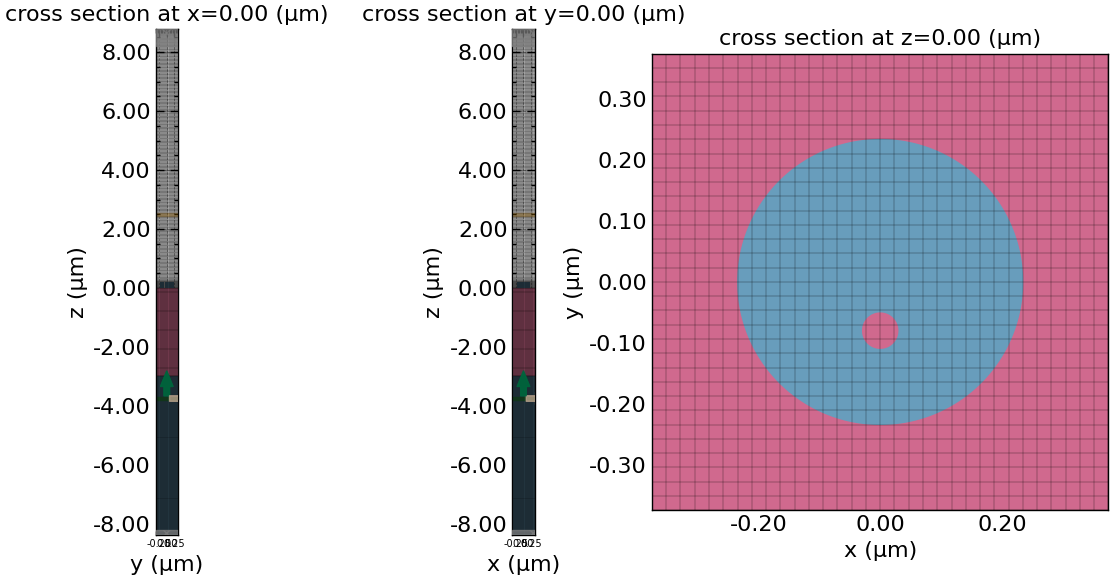

In [33]:
# Always visualize simulation before running
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, tight_layout=True, figsize=(12, 6))
ax1.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='x', labelsize=7)
sim.plot(x=0, ax=ax1)
sim.plot_grid(x=0, ax=ax1)
sim.plot(y=0, ax=ax2)
sim.plot_grid(y=0, ax=ax2)
sim.plot(z=0, ax=ax3)
sim.plot_grid(z=0, ax=ax3)
plt.savefig(f'geomp_structure.png', dpi=300)
plt.show()

In [12]:
sim.plot_3d()

In [5]:
# # upload the simulation to our servers
# task_id = web.upload(sim, task_name="circular", verbose=True)

# # start the simulation running
# web.start(task_id)

# # monitor the simulation, don't move on to next line until completed.
# web.monitor(task_id, verbose=True)

# # download the results and load into a simulation data object for plotting, post processing etc.
# sim_data = web.load(task_id, path="data/circular.hdf5", verbose=True)

# If you already ran the task and has the task_id
sim_data = web.load(task_id='fdve-275dd7f9-ea16-44fe-ba14-7d567b82ce9d', path="data/circular.hdf5", verbose=True)

/Users/yankunmeng/.local/lib/python3.10/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

00:32:28 EDT loading simulation from data/circular.hdf5

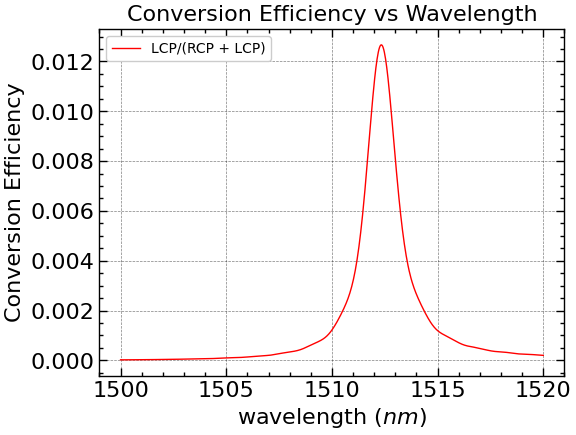

In [28]:
# this uses scienceplots to make plots look better
plt.style.use(['science', 'notebook', 'grid'])
# plot transmission, compare to paper results, look similar
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
plt.plot(td.C_0 / fr.freqs(N) * 1000, I_LCP/(I_RCP + I_LCP), '-', color="r", lw=1, label="LCP/(RCP + LCP)")
plt.xlabel(r"wavelength ($nm$)")
plt.ylabel("Conversion Efficiency")
plt.legend(loc="upper left", fontsize=10)
plt.title("Conversion Efficiency vs Wavelength")
plt.savefig("conv_eff", dpi=300)
plt.show()